# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [4]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

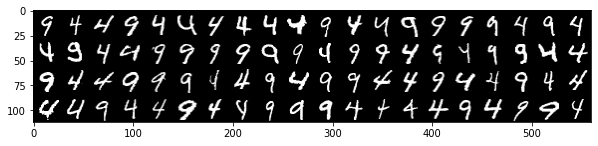

In [5]:
show_digit(X)

In [6]:
# Do feature normalization here
# begin answer
X=X.astype('float64')
X-=np.mean(X,axis=0)
X/=np.std(X,axis=0)
# end answer

### Ridge Regression and LOOCV

In [7]:
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X,j,axis=1) # take point j out of X
        y_ = np.delete(y,j,axis=1)
        w = ridge(X_, y_, lmbdas[i])
        E_val = E_val + int(y[0,j]!=(1 if np.dot(w[1:,0].T,X[:,j])+w[0,0]>0 else -1))
    E_val/=y.shape[1]
    print(f'λ = {lmbdas[i]:>10.3f}, error = {E_val*100:<3.3f}%')
    # Update lmbda according validation error
    # begin answer
    if E_val<E_val_min:
        E_val_min=E_val
        lmbda=lmbdas[i]
    # end answer

# Compute training error
w = ridge(X, y, lmbda)
E_train=(np.where(np.dot(w[1:,0].T,X)+w[0,0]>0.0,1,-1)!=y).sum()/y.shape[1]
# Do feature normalization to X_test, y_test
X_test=X_test.astype('float64')
X_test-=np.mean(X_test,axis=0)
X_test/=np.std(X_test,axis=0)
# Compute test error
E_test=(np.where(np.dot(w[1:,0].T,X_test)+w[0,0]>0.0,1,-1)!=y_test).sum()/y_test.shape[1]
print(f'The best λ = {lmbda}')
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))

λ =      0.001, error = 6.000%
λ =      0.010, error = 6.000%
λ =      0.100, error = 6.000%
λ =      0.000, error = 6.000%
λ =      1.000, error = 5.500%
λ =     10.000, error = 5.000%
λ =    100.000, error = 4.000%
λ =   1000.000, error = 4.000%
The best λ = 100.0
E_train is 0.00000%, E_test is 6.47916%


In [8]:
from ridge import ridge

print("no regularization")
w = ridge(X, y, 0)
print(f"λ = 0,sum(w**2)={sum(w**2)[0]:.3f}")
E_train=(np.where(np.dot(w[1:,0].T,X)+w[0,0]>0.0,1,-1)!=y).sum()/y.shape[1]
# Do feature normalization to X_test, y_test
X_test=X_test.astype('float64')
X_test-=np.mean(X_test,axis=0)
X_test/=np.std(X_test,axis=0)
# Compute test error
E_test=(np.where(np.dot(w[1:,0].T,X_test)+w[0,0]>0.0,1,-1)!=y_test).sum()/y_test.shape[1]
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))
print("\n\n")

print("use regularization")
w = ridge(X, y, lmbda)
print(f"λ = {lmbda},sum(w**2)={sum(w**2)[0]:.3f}")
E_train=(np.where(np.dot(w[1:,0].T,X)+w[0,0]>0.0,1,-1)!=y).sum()/y.shape[1]
# Do feature normalization to X_test, y_test
X_test=X_test.astype('float64')
X_test-=np.mean(X_test,axis=0)
X_test/=np.std(X_test,axis=0)
# Compute test error
E_test=(np.where(np.dot(w[1:,0].T,X_test)+w[0,0]>0.0,1,-1)!=y_test).sum()/y_test.shape[1]
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))

no regularization
λ = 0,sum(w**2)=0.892
E_train is 0.00000%, E_test is 9.04068%



use regularization
λ = 100.0,sum(w**2)=0.113
E_train is 0.00000%, E_test is 6.47916%


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [9]:
from logistic_r import logistic_r
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = np.delete(X,j,axis=1) # take point j out of X
        y_ = np.delete(y,j,axis=1)
        w = logistic_r(X_, y_, lmbdas[i])
        
        E_val = E_val + int(y[0,j]!=(1 if np.dot(w[1:,0].T,X[:,j])+w[0,0]>0 else -1))

    E_val/=y.shape[1]
    print(f'λ = {lmbdas[i]:>10.3f}, error = {E_val*100:<3.3f}%')
    # Update lmbda according validation error
    # begin answer
    if E_val<E_val_min:
        E_val_min=E_val
        lmbda=lmbdas[i]
    # end answer
    
# Compute training error
w = logistic_r(X, y, lmbda)
E_train=(np.where(np.dot(w[1:,0].T,X)+w[0,0]>0.0,1,-1)!=y).sum()/y.shape[1]
# Do feature normalization to X_test, y_test
X_test=X_test.astype('float64')
X_test-=np.mean(X_test,axis=0)
X_test/=np.std(X_test,axis=0)
# Compute test error
E_test=(np.where(np.dot(w[1:,0].T,X_test)+w[0,0]>0.0,1,-1)!=y_test).sum()/y_test.shape[1]

print(f'Best λ = {lmbda:4.4f}')
print('E_train is {:.2f}%, E_test is {:.2f}%'.format(E_train*100, E_test*100))

λ =      0.001, error = 3.500%
λ =      0.010, error = 3.500%
λ =      0.100, error = 3.500%
λ =      0.000, error = 3.500%
λ =      1.000, error = 4.500%
λ =     10.000, error = 11.000%
λ =    100.000, error = 15.500%
λ =   1000.000, error = 26.000%
Best λ = 0.0010
E_train is 0.00%, E_test is 5.07%


In [10]:
from logistic_r import logistic_r

print("no regularization")
w = logistic_r(X, y, 0)
print(f"λ = 0,sum(w**2)={sum(w**2)[0]:.3f}")
E_train=(np.where(np.dot(w[1:,0].T,X)+w[0,0]>0.0,1,-1)!=y).sum()/y.shape[1]
# Do feature normalization to X_test, y_test
X_test=X_test.astype('float64')
X_test-=np.mean(X_test,axis=0)
X_test/=np.std(X_test,axis=0)
# Compute test error
E_test=(np.where(np.dot(w[1:,0].T,X_test)+w[0,0]>0.0,1,-1)!=y_test).sum()/y_test.shape[1]
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))
print("\n")

print("use regularization")
w = logistic_r(X, y, lmbda)
print(f"λ = {lmbda},sum(w**2)={sum(w**2)[0]:.3f}")
E_train=(np.where(np.dot(w[1:,0].T,X)+w[0,0]>0.0,1,-1)!=y).sum()/y.shape[1]
# Do feature normalization to X_test, y_test
X_test=X_test.astype('float64')
X_test-=np.mean(X_test,axis=0)
X_test/=np.std(X_test,axis=0)
# Compute test error
E_test=(np.where(np.dot(w[1:,0].T,X_test)+w[0,0]>0.0,1,-1)!=y_test).sum()/y_test.shape[1]
print('E_train is {:.5f}%, E_test is {:.5f}%'.format(E_train*100, E_test*100))

no regularization
λ = 0,sum(w**2)=1.153
E_train is 0.00000%, E_test is 5.07283%


use regularization
λ = 0.001,sum(w**2)=1.149
E_train is 0.00000%, E_test is 5.07283%
